
MÁSTER BIG DATA & DATA ENGINEERING

Programación avanzada en Python

Autores: Luis Llana Díaz & Yolanda García Ruiz



# Trabajo final

## Nota Preliminar

Antes de desarrollar el proyecto, es aconsejable leer el enunciado completamente, incluyendo las instrucciones de entrega y otros consejos que se  recogen al final de este enunciado.
En este enunciado se pueden producir cambios durante su desarrollo por distintos motivos: porque se descubre una situación anómala que no ha sido prevista al preparar el enunciado, porque algún estudiante encuentre un error o ambigüedad en la descripción o en los datos de partida o por cualquier otra causa. Esto ocurre también en cualquier proyecto real, así que tomárselo con el mejor talante y aprender también de estas eventuales contingencias. Se procurará informar debidamente del mejor modo posible cuando esto se produzca.


## Introducción

En el portal de datos abiertos de la EMT de Madrid se puede encontrar abundante información sobre transporte y movilidad de la ciudad. En particular los datos relativos a la utilización del servicio de bicicletas eléctricas del ayuntamiento de Madrid.
La dirección del portal mencionado es la siguiente:

https://opendata.emtmadrid.es/Home

y el enlace donde se encuentran los datos relativos a BiciMAD es el siguiente:

https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)

En esta página podemos encontrar los datos de uso de BiciMAD por meses desde abril de 2019 hasta el mes Febrero de 2023. Se trata de un conjunto de URLs a ficheros comprimidos ZIP, donde una vez descomprimidos, podemos encontrar un fichero en formato `csv`.
En esta práctica __solo nos va a interesar los datos de uso desde junio el 2021__. Son ficheros con nombre:

`
trips_YY_MM_monthName.csv
`

donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.

Los datos del mes 10 del año 2021 está mal generado por la EMT, por lo que se pide que no se use ese fichero.

### Metadatos

En cada uno de los ficheros `csv` podemos encontrar los siguientes datos:

* `date` (Fecha): La fecha en la que tuvo lugar el viaje.
* `idbike` (ID de Bicicleta): El identificador único de la bicicleta utilizada para el viaje.
* `fleet` (Flota): La flota a la que pertenece la bicicleta utilizada.
* `trip_minutes` (Duración del Viaje en Minutos): La duración del viaje en minutos.
* `geolocation_unlock` (Geolocalización de Desbloqueo): Las coordenadas geográficas del lugar de inicio del viaje.
* `address_unlock` (Dirección de Desbloqueo): La dirección postal en la que se desbloqueó la bicicleta.
* `unlock_date` (Fecha y Hora de Desbloqueo): La fecha y hora exactas en las que comenzó el viaje.
* `locktype` (Tipo de Bloqueo): El estado de la bicicleta antes del viaje. Puede estar anclada en una estación o simplemente bloqueada en cualquier lugar libremente.
* `unlocktype` (Tipo de Desbloqueo): El estado de la bicicleta después del viaje.
* `geolocation_lock` (Geolocalización de Bloqueo): Las coordenadas geográficas del lugar final del viaje.
* `address_lock` (Dirección de Bloqueo): La dirección postal en la que se bloqueó la bicicleta.
* `lock_date` (Fecha y Hora de Bloqueo): La fecha y hora exactas en las que finalizó el viaje.
* `station_unlock` (Número de Estación de Desbloqueo): El número de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `dock_unlock` (Muelle de Desbloqueo): El muelle de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
*  `unlock_station_name` (Nombre de la Estación de Desbloqueo): El nombre de la estación en la que la bicicleta estaba anclada antes del viaje, si la había.
* `station_lock` (Número de Estación de Bloqueo): El número de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `dock_lock` (Muelle de Bloqueo): El muelle de la estación en la que la bicicleta estaba anclada después del viaje, si la había.
* `lock_station_name` (Nombre de la Estación de Bloqueo): El nombre de la estación en la que la bicicleta estaba anclada después del viaje, si la había.

## Librerías

Importar todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.

In [1]:
pip install pandas numpy matplotlib seaborn zipfile os datetime

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement zipfile (from versions: none)
ERROR: No matching distribution found for zipfile

[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install matplotlib
!pip install seaborn



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Sol
import pandas as pd  # Para manipulación de datos
import numpy as np  # Para operaciones numéricas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para gráficos estadísticos
import zipfile  # Para descomprimir archivos ZIP
import os  # Para manejo de archivos y directorios
from datetime import datetime  # Para manejo de fechas

## ETAPA 1. Análisis exploratorio y consultas.



### La descarga de los ficheros

En este notebook vamos a estudiar únicamente los datos de febrero de 2023.
La URL que permite descargar dichos datos es la siguiente:

In [4]:
url = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"

Observa que en la URL aparece la cadena `trips_23_02`, y que el fichero ZIP tiene un archivo de datos en formato csv llamado `trips_23_02_February.csv`.


__Se pide:__
 Escribir una función llamada `csv_from_zip` que reciba como único argumento un string que represente la URL al fichero ZIP de datos de uso y devuelva un fichero en formato CSV. El tipo del objeto devuelto es `TextIO`. La función  lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT.

__Observaciones:__
En el notebook `05_ficheros` del módulo de `Secuencias` se habla del manejo de ficheros en formato ZIP, y de cómo leer un fichero, transformarlo en una cadena de caracteres para posteriormente, usando el método `String.IO`, obtener un fichero de texto.
Deberás importar el módulo `typing`.

In [5]:
# Solución:
import requests
import zipfile
import io
from typing import TextIO

def csv_from_zip(url: str) -> TextIO:
    """Descarga un archivo ZIP desde la URL, extrae el CSV y devuelve un archivo de texto.
    
    Args:
        url (str): URL del archivo ZIP que contiene el CSV de datos.
    
    Returns:
        TextIO: Archivo de texto en formato CSV extraído del ZIP.
    
    Raises:
        ConnectionError: Si falla la conexión al descargar el archivo.
    """
    try:
        # Solicitar el archivo ZIP desde la URL
        response = requests.get(url)
        response.raise_for_status()  # Lanza una excepción para códigos de error HTTP
        
        # Leer el archivo ZIP en memoria
        zip_file = zipfile.ZipFile(io.BytesIO(response.content))
        
        # Encontrar el archivo CSV dentro del ZIP
        csv_filename = [name for name in zip_file.namelist() if name.endswith('.csv')][0]
        
        # Leer el archivo CSV y convertirlo a formato TextIO
        with zip_file.open(csv_filename) as csv_file:
            csv_text = io.StringIO(csv_file.read().decode('utf-8'))
        
        return csv_text

    except requests.RequestException:
        raise ConnectionError("Fallo en la conexión al servidor de la EMT.")
    except zipfile.BadZipFile:
        raise ValueError("El archivo descargado no es un archivo ZIP válido.")
    except IndexError:
        raise ValueError("No se encontró un archivo CSV en el archivo ZIP.")


In [6]:
# Prueba


csvfile = csv_from_zip(url)

#file_path = "trips_23_02_February-csv.zip"
#csvfile = csv_from_zip(file_path)

### Creación del dataframe de datos

__Se pide:__
Crear una función llamada `get_data` que reciba como único argumento un fichero csv y que devuelva un objeto de tipo DataFrame con las siguientes restricciones:
* El índice del dataframe debe ser a fecha en la que tuvo lugar el viaje (usa el argumento `index_col`).
* Todas las fechas que aparecen en los datos ha de tener tipo `datetime` (usa el argumento 'parse_dates`).
* De todas las columnas que hay en el fichero, solo nos interesan las siguientes:

   ```
     [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype',
     'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock', 'unlock_station_name',
     'station_lock', 'lock_station_name']
   ```

por lo que el dataframe ha de tener solo dichas columnas.

__Observaciones:__ Observa que los datos de usos que publica la EMT son fichero CSV donde el separador de campos es el símbolo `;`.

In [7]:
# Solución
import pandas as pd
from typing import TextIO

def get_data(csv_file: TextIO) -> pd.DataFrame:
    """Carga un archivo CSV en un DataFrame de Pandas con restricciones específicas.
    
    Args:
        csv_file (TextIO): Objeto de archivo CSV.
    
    Returns:
        pd.DataFrame: DataFrame con las columnas seleccionadas y la fecha como índice.
    """
    # Definir las columnas de interés
    columns_of_interest = [
        'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock',
        'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock',
        'lock_date', 'station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name'
    ]
    
    # Leer el archivo CSV
    df = pd.read_csv(
        csv_file,
        sep=';',  # Usar el separador específico
        index_col='unlock_date',  # Usar la fecha de desbloqueo como índice
        parse_dates=['unlock_date', 'lock_date'],  # Convertir fechas a datetime
        usecols=columns_of_interest  # Seleccionar solo las columnas deseadas
    )
    
    return df

In [8]:
# prueba
usos = get_data(csvfile)
usos.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
unlock_date,,,,,,,,,,,,,,
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01 00:00:10,7337.0,1.0,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2023-02-01 00:00:25,5098.0,1.0,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


### Explorar la estructura de los datos en el dataframe

El método `info` devuelve información acerca de la estructura de un dataframe.

__Se pide:__
Escribe el código necesario para crear un dataframe llamado `usos` a partir de la url "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx".
Ejecuta el método `info()` sobre el dataframe y comenta los resultados.
Fíjate en las columnas que representan fechas y comprueba su tipo de datos. ¿Cuántas filas se han cargado?. Fíjate en los valores distintos de `NaN` en cada una de las columnas.

In [9]:
# Solución
import requests
import zipfile
import io
import pandas as pd

# Paso 1: Descargar y extraer el archivo CSV desde la URL
def csv_from_url(url: str) -> io.StringIO:
    """Descarga un archivo ZIP desde la URL y extrae el archivo CSV."""
    response = requests.get(url)
    response.raise_for_status()  # Lanza una excepción si la descarga falla
    zip_file = zipfile.ZipFile(io.BytesIO(response.content))
    
    # Extraer el archivo CSV
    csv_filename = [name for name in zip_file.namelist() if name.endswith('.csv')][0]
    with zip_file.open(csv_filename) as csv_file:
        csv_text = io.StringIO(csv_file.read().decode('utf-8'))
    
    return csv_text

# Paso 2: Cargar el archivo CSV en un DataFrame con restricciones
def get_data(csv_file: io.StringIO) -> pd.DataFrame:
    """Carga el archivo CSV en un DataFrame con restricciones de columnas y tipos de datos."""
    columns_of_interest = [
        'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock',
        'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock',
        'lock_date', 'station_unlock', 'unlock_station_name', 'station_lock', 'lock_station_name'
    ]
    
    df = pd.read_csv(
        csv_file,
        sep=';',  # Separador punto y coma
        index_col='unlock_date',  # Establecer 'unlock_date' como índice
        parse_dates=['unlock_date', 'lock_date'],  # Convertir fechas a datetime
        usecols=columns_of_interest  # Seleccionar solo las columnas de interés
    )
    return df

# URL del archivo de datos de BiciMAD de febrero de 2023
url = "https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx"

# Crear el DataFrame `usos`
csvfile = csv_from_url(url)
usos = get_data(csvfile)

# Explorar la estructura del DataFrame
usos_info = usos.info()
print(usos_info)

# Calcular valores no nulos en cada columna
na_counts = usos.notna().sum()
print("\nValores distintos de NaN en cada columna:")
print(na_counts)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  station_lock         168018 non-null  float64       
 

### Borrado de valores NaN.

El método  `dropna` de los DataFrames tiene un argumento `how` que permite indicar que se borren filas o columnas donde todos los valores son `NaN`.

__Se pide:__ Crear una función llamada `delete_nan_rows` que borre las filas con todos sus valores `NaN` de un dataframe recibido como argumento. La función modifica el dataframe y no devuelve nada.  

Comenta los resultados. Prueba la función `delete_nan_rows` con el dataframe `usos`. Comprueba que el número de filas del dataframe `usos` ha cambiado. Puedes volver a ejecutar el método `info` y compáralo con el resultado antes de invocar a la función `delete_nan_rows`.

In [10]:
# Solución
def delete_nan_rows(df: pd.DataFrame) -> None:
    """Elimina las filas de un DataFrame que tienen todos sus valores como NaN.
    
    Args:
        df (pd.DataFrame): El DataFrame al cual se le eliminarán las filas con todos los valores NaN.
    """
    df.dropna(how="all", inplace=True)

    # Mostrar información del DataFrame antes de eliminar filas con NaN
print("Antes de eliminar filas con todos sus valores NaN:")
usos_info_before = usos.info()

# Aplicar la función delete_nan_rows
delete_nan_rows(usos)

# Mostrar información del DataFrame después de eliminar filas con NaN
print("\nDespués de eliminar filas con todos sus valores NaN:")
usos_info_after = usos.info()

# Comparación de filas
print("\nComparación de número de filas:")
print(f"Antes: {usos_info_before} filas")
print(f"Después: {usos_info_after} filas")


Antes de eliminar filas con todos sus valores NaN:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 336988 entries, NaT to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  float64       
 1   fleet                168494 non-null  float64       
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object        
 12  sta

###  Exploración de las columnas.

La columna `fleet` representa el tipo de flota de bicicleta eléctrica.
Las BiciMAD Go son free floating y se corresponden con tipo de flota 2. A diferencia de las BiciMAD normales, no tienen por qué dejarse en una estación de bicicletas, aunque existe la posibilidad de hacerlo. Su bloqueo se realiza por medio de un candado manual, aspecto en el que se diferencian de las otras bicis municipales.

Por otro lado, las columnas `locktype` y `unlocktype` tienen información del tipo de bloqueo y desbloqueo respectivamente.

__Se pide:__
* ¿Cuántos valores distintos hay en la columna `fleet` del dataframe `usos`?
* ¿Cuántos valores distintos hay en las columnas `locktype` y `unlocktype` del dataframe `usos`?

In [11]:
# Sol
# Contar valores distintos en la columna fleet
fleet_unique_count = usos['fleet'].nunique()
print(f"Valores distintos en la columna 'fleet': {fleet_unique_count}")

# Contar valores distintos en las columnas locktype y unlocktype
locktype_unique_count = usos['locktype'].nunique()
unlocktype_unique_count = usos['unlocktype'].nunique()
print(f"Valores distintos en la columna 'locktype': {locktype_unique_count}")
print(f"Valores distintos en la columna 'unlocktype': {unlocktype_unique_count}")


Valores distintos en la columna 'fleet': 2
Valores distintos en la columna 'locktype': 2
Valores distintos en la columna 'unlocktype': 2


### Cambio de tipo de datos

Las columnas  `idBike` y `fleet`  tienen tipo float, pero en realidad representan un identificador de bicicleta y de flota respectivamente.

__Se pide:__ Crear una función llamada `float_to_str` que cambie el tipo de una columna a tipo string. La función recibe como argumentos un dataframe y el nombre de una columna. La función no devuelve nada.
Si la columna no se encuentra entre las columnas del dataframe, la función no hace nada.

__Observaciones:__ Puedes usar la función `map` para aplicar la función de transformación.

Prueba la función con el datafame `usos` y  las columnas `idBike` y `fleet`.
De esta forma, el identificador de bicicleta `7337.0` pasará a ser `'7337'`. Ejecuta la función `info` sobre el dataframe `usos` para comprobar que los tipos asociados a esas columnas han cambiado.

In [12]:
# Solución
def float_to_str(df: pd.DataFrame, column_name: str) -> None:
    """Convierte el tipo de una columna de un DataFrame a string, si existe la columna.
    
    Args:
        df (pd.DataFrame): El DataFrame que contiene la columna a convertir.
        column_name (str): El nombre de la columna a convertir a string.
    """
    if column_name in df.columns:
        df[column_name] = df[column_name].map(lambda x: str(int(x)) if pd.notna(x) else None)

# Aplicar la función float_to_str en las columnas 'idBike' y 'fleet' del DataFrame usos
float_to_str(usos, 'idBike')
float_to_str(usos, 'fleet')

# Verificar los cambios de tipo con el método info()
print("\nEstructura del DataFrame después de la conversión:")
usos.info()



Estructura del DataFrame después de la conversión:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168494 entries, 2023-02-01 00:00:10 to 2023-02-18 07:22:48
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   idBike               168494 non-null  object        
 1   fleet                168494 non-null  object        
 2   trip_minutes         168494 non-null  float64       
 3   geolocation_unlock   168494 non-null  object        
 4   address_unlock       168494 non-null  object        
 5   locktype             168494 non-null  object        
 6   unlocktype           168494 non-null  object        
 7   geolocation_lock     168494 non-null  object        
 8   address_lock         168494 non-null  object        
 9   lock_date            168494 non-null  datetime64[ns]
 10  station_unlock       168114 non-null  float64       
 11  unlock_station_name  168114 non-null  object

## Consultas

Las siguientes consultas se realizarán con el dataframe `usos` creado en los apartados anteriores.

### C1

¿Cuántas bicicletas han sido desbloqueadas de una estación y no se bloquean en ninguna?

In [35]:
#from bicimad import Bicimad

# Filtrar bicicletas desbloqueadas en una estación pero no bloqueadas en ninguna
bicicletas_sin_bloqueo = usos[(usos['station_unlock'].notna()) & (usos['station_lock'].isna())]

# Contar la cantidad de registros que cumplen esta condición
cantidad_bicicletas_sin_bloqueo = bicicletas_sin_bloqueo.shape[0]
print(f"Cantidad de bicicletas desbloqueadas en una estación y no bloqueadas en ninguna: {cantidad_bicicletas_sin_bloqueo}")



Cantidad de bicicletas desbloqueadas en una estación y no bloqueadas en ninguna: 168


### C2

Seleccionar solo las bicicletas del tipo de flota '1' . El nuevo dataframe se ha de llamar `regular_fleet`.

In [14]:
# Sol
# Filtrar las bicicletas del tipo de flota '1'
regular_fleet = usos[usos['fleet'] == '1']

# Mostrar las primeras filas para confirmar el filtrado
regular_fleet.head()

,idBike,fleet,trip_minutes,geolocation_unlock,address_unlock,locktype,unlocktype,geolocation_lock,address_lock,lock_date,station_unlock,unlock_station_name,station_lock,lock_station_name
unlock_date,,,,,,,,,,,,,,
2023-02-01 00:00:10,7337,1,5.52,"{'type': 'Point', 'coordinates': [-3.6956178, ...",'Calle Jesús nº 1',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7088337, ...",'Plaza de la Cebada nº 16 ',2023-02-01 00:05:41,31.0,27 - Huertas,43.0,39 - Plaza de la Cebada
2023-02-01 00:00:25,5098,1,0.32,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',2023-02-01 00:00:44,52.0,48 - Embajadores 2,52.0,48 - Embajadores 2
2023-02-01 00:00:36,6519,1,0.27,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:00:52,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura
2023-02-01 00:00:53,2551,1,8.58,"{'type': 'Point', 'coordinates': [-3.7022591, ...",'Glorieta de Embajadores nº 2',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6991147, ...",'Calle Atocha nº 54',2023-02-01 00:09:28,52.0,48 - Embajadores 2,45.0,41 - Antón Martín
2023-02-01 00:00:57,6519,1,0.20,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',STATION,STATION,"{'type': 'Point', 'coordinates': [-3.6894193, ...",'Calle Antonio Maura nº 15',2023-02-01 00:01:09,69.0,65 - Antonio Maura,69.0,65 - Antonio Maura


### C3

Crea una función llamada `day_time` para calcular las horas totales de uso de bicicletas por día del mes.
La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de horas.

Prueba la función anterior con el dataframe  `usos`.

__Opcional:__ Dibuja un diagrama de barras con el resultado de la función `day_time` sobre el dataframe `usos`. Utiliza el módulo `matplotlib.pyplot`.

2023-02-01    4160.538500
2023-02-02    3435.122333
2023-02-03    3456.311667
2023-02-04    3640.818667
2023-02-05    3263.938167
Name: trip_minutes, dtype: float64


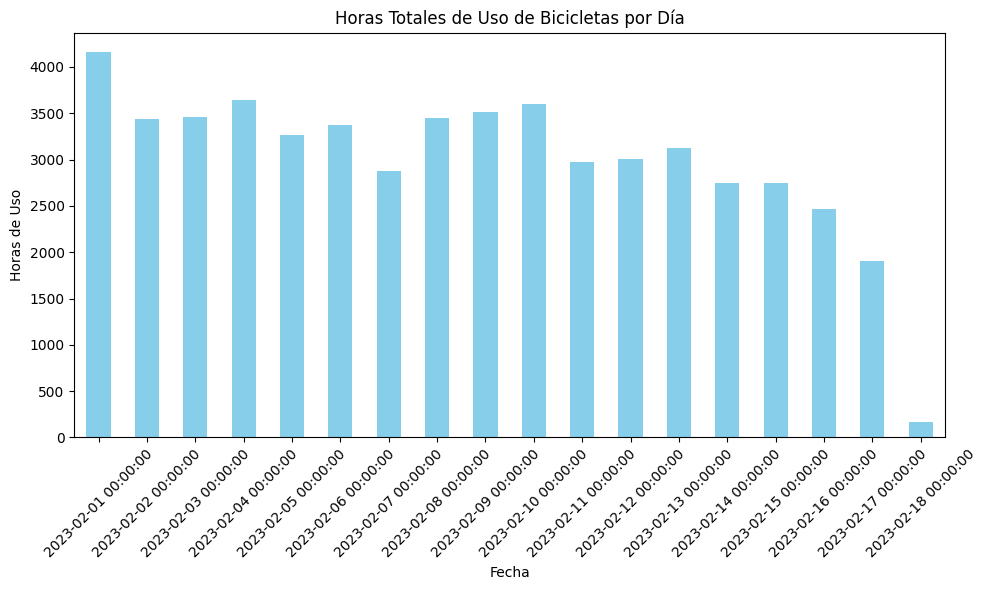

In [15]:
# Sol

import matplotlib.dates as mdates


def day_time(df: pd.DataFrame) -> pd.Series:
    """Calcula las horas totales de uso de bicicletas por día.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        pd.Series: Serie donde el índice es la fecha y el valor es el número de horas de uso.
    """
    # Agrupar por fecha y sumar los minutos de viaje
    daily_minutes = df['trip_minutes'].groupby(df.index.date).sum()
    
    # Convertir minutos a horas
    daily_hours = daily_minutes / 60
    
    # Cambiar el índice a tipo datetime para facilitar el uso en gráficos
    daily_hours.index = pd.to_datetime(daily_hours.index)
    
    return daily_hours

# Probar la función con el DataFrame `usos`
daily_hours_usage = day_time(usos)
print(daily_hours_usage.head())

# Opcional: Diagrama de barras con el uso diario de bicicletas en horas
plt.figure(figsize=(10, 6))
daily_hours_usage.plot(kind='bar', color='skyblue')
plt.title("Horas Totales de Uso de Bicicletas por Día")
plt.xlabel("Fecha")
plt.ylabel("Horas de Uso")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### C4

Crea una función llamada `weekday_time` para calcular las horas totales de uso de bicicletas por día de la semana. La función recibe un dataframe y devuelve una Serie donde el índice es el día de la semana (L, M, X, J, V, S, D) y el valor es el número de horas.

Prueba la función anterior con el dataframe usos.



In [16]:
# Solución
def weekday_time(df: pd.DataFrame) -> pd.Series:
    """Calcula las horas totales de uso de bicicletas por día de la semana.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        pd.Series: Serie donde el índice es el día de la semana (L, M, X, J, V, S, D)
                   y el valor es el número de horas de uso.
    """
    # Mapear los días de la semana a sus abreviaciones
    day_map = {0: 'L', 1: 'M', 2: 'X', 3: 'J', 4: 'V', 5: 'S', 6: 'D'}
    
    # Agregar columna temporal con el día de la semana
    df['weekday'] = df.index.dayofweek.map(day_map)
    
    # Agrupar por día de la semana y sumar los minutos de viaje
    weekly_minutes = df.groupby('weekday')['trip_minutes'].sum()
    
    # Convertir minutos a horas
    weekly_hours = weekly_minutes / 60
    
    return weekly_hours

# Probar la función con el DataFrame `usos`
weekday_hours_usage = weekday_time(usos)
weekday_hours_usage

weekday
D     6267.562167
J     9412.645333
L     6494.488500
M     5626.440667
S     6781.029667
V     8958.274000
X    10349.659667
Name: trip_minutes, dtype: float64

### C5

Crea una función llamada `total_usage_day` para calcular el número total de usos de bicicletas por día del mes. La función recibe un dataframe y devuelve una Serie donde el índice es la fecha y el valor es el número de usos.

Prueba la función anterior con el dataframe usos.



In [17]:
# Sol
def total_usage_day(df: pd.DataFrame) -> pd.Series:
    """Calcula el número total de usos de bicicletas por día del mes.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        pd.Series: Serie donde el índice es la fecha y el valor es el número total de usos.
    """
    # Agrupar por fecha (índice del DataFrame) y contar los usos de bicicletas
    daily_usage = df.groupby(df.index.date).size()
    
    # Cambiar el índice a tipo datetime para una mejor manipulación
    daily_usage.index = pd.to_datetime(daily_usage.index)
    
    return daily_usage

# Probar la función con el DataFrame `usos`
daily_usage_counts = total_usage_day(usos)
daily_usage_counts

2023-02-01    11442
2023-02-02    11069
2023-02-03    10166
2023-02-04     8903
2023-02-05     8026
2023-02-06    10118
2023-02-07     8986
2023-02-08    10576
2023-02-09    10814
2023-02-10    10579
2023-02-11     8383
2023-02-12     7801
2023-02-13     9802
2023-02-14    10341
2023-02-15    10766
2023-02-16     9684
2023-02-17    10067
2023-02-18      971
dtype: int64

### C6

Calcular el total de usos por fecha y estación de desbloqueo. Como la fecha está en el índice y la estación de desbloqueo es una columna, lo mejor es agrupar por la columna `station_unlock` y  un objeto `Grouper` de frecuencia diaria (1D).

A continuación, se muestra un ejemplo del funcionamiento de la función Grouper de pandas:
```
>>> df
             ID  Price
2000-01-02   0     10
2000-01-02   1     20
2000-01-09   2     30
2000-01-16   3     40

# Grouper con frecuencia semanal (1W)
>>> df.groupby(pd.Grouper(freq="1W")).mean()
               ID  Price

2000-01-02    0.5   15.0
2000-01-09    2.0   30.0
2000-01-16    3.0   40.0
```

In [18]:
# Solución
def total_usage_by_date_and_station(df: pd.DataFrame) -> pd.DataFrame:
    """Calcula el total de usos de bicicletas por fecha y estación de desbloqueo.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        pd.DataFrame: DataFrame con el total de usos por fecha y estación de desbloqueo.
    """
    # Agrupar por estación de desbloqueo y fecha (frecuencia diaria)
    usage_by_date_station = df.groupby([pd.Grouper(freq="1D"), 'station_unlock']).size()
    
    # Convertir el resultado a DataFrame y renombrar la columna
    usage_by_date_station = usage_by_date_station.reset_index(name='total_usos')
    
    return usage_by_date_station

# Probar la función con el DataFrame `usos`
usage_by_date_station = total_usage_by_date_and_station(usos)
usage_by_date_station.head()

,unlock_date,station_unlock,total_usos
0,2023-02-01,1.0,31
1,2023-02-01,2.0,23
2,2023-02-01,3.0,39
3,2023-02-01,4.0,27
4,2023-02-01,5.0,26


### C7

Se quiere averiguar la dirección de las estaciones de desbloqueo que a lo largo del mes han tenido un mayor número de viajes. Crear una función llamada `most_popular_stations` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un conjunto con la dirección de las estaciones.



In [19]:
# Sol
def most_popular_stations(df: pd.DataFrame) -> set:
    """Calcula las direcciones de las estaciones de desbloqueo con el mayor número de viajes en el mes.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        set: Conjunto con las direcciones de las estaciones de desbloqueo más populares.
    """
    # Agrupar por dirección de desbloqueo y contar el número de viajes
    station_usage = df.groupby('address_unlock').size()
    
    # Encontrar el máximo número de viajes
    max_usage = station_usage.max()
    
    # Filtrar las direcciones con el número máximo de viajes y convertir a un conjunto
    popular_stations = set(station_usage[station_usage == max_usage].index)
    
    return popular_stations

# Probar la función con el DataFrame `usos`
popular_stations = most_popular_stations(usos)
print("Direcciones de las estaciones de desbloqueo más populares:", popular_stations)

Direcciones de las estaciones de desbloqueo más populares: {"'Plaza de la Cebada nº 16 '"}


### C8

Se quiere averiguar el  número de usos de las estaciones de desbloqueo que a lo largo del mes ha tenido un mayor número de viajes. Crear una función llamada `usage_from_most_popular_station` que calcule dicho dato. El argumento de la función es un dataframe y devuelve un entero.

In [20]:
# Sol
def usage_from_most_popular_station(df: pd.DataFrame) -> int:
    """Calcula el número total de usos de las estaciones de desbloqueo con el mayor número de viajes en el mes.
    
    Args:
        df (pd.DataFrame): DataFrame con datos de uso de bicicletas.
    
    Returns:
        int: Número total de usos de las estaciones más populares.
    """
    # Agrupar por dirección de desbloqueo y contar el número de viajes
    station_usage = df.groupby('address_unlock').size()
    
    # Encontrar el máximo número de viajes
    max_usage = station_usage.max()
    
    # Calcular el número total de usos de las estaciones más populares
    total_usage = station_usage[station_usage == max_usage].sum()
    
    return total_usage

# Probar la función con el DataFrame `usos`
total_usage_popular_stations = usage_from_most_popular_station(usos)
print("Número total de usos de las estaciones más populares:", total_usage_popular_stations)

Número total de usos de las estaciones más populares: 2189


# ETAPA 2: Construcción del módulo bicimad

En esta sección se proporcionan algunas instrucciones para la creación del módulo `bicimad`.
La gran mayoría de métodos y funciones pedidas aquí, se han implementado de alguna manera en la sección anterior, por lo que la construcción del módulo y las clases que se pide a continuación es en gran medida una reorganización de código. El módulo `bicimad` debe exportar las clases `UrlEMT` y `BiciMad` descritas a continuación.



## Clase `UrlEMT`

Vamos a crear una clase que permita recopilar todos los enlaces que hay en la web de la EMT (https://opendata.emtmadrid.es/Datos-estaticos/Datos-generales-(1)), que se corresponden con datos de uso de bicicletas desde Junio de 2021. Los enlaces que cumplen esta restricción son los que denominaremos a partir de ahora _enlaces válidos_. Estos enlaces contienen la cadena `trips_YY_MM_monthName.csv` donde `YY` representa el año, `MM` representa el mes y `monthName` representa el nombre del mes en inglés.


__Requisitos:__

* La clase ha de contener dos constantes de clase:
```
EMT = 'https://opendata.emtmadrid.es/'
GENERAL = "/Datos-estaticos/Datos-generales-(1)"
```

* Los objetos de la clase tienen un único atributo privado que representa el conjunto enlaces válidos que se encuentran en el sitio web de la EMT.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor sin argumentos.
    * `select_valid_urls`: método estático que se encarga de actualizar el atributo de los objetos de la clase. Devuelve un conjunto de enlaces válidos. Si la petición al servidor de la EMT devuelve un código de retorno distinto de 200, la función lanza una excepción de tipo `ConnectionError`.
    
    * Para extraer los enlaces hay que definir una funcion `get_links` que tome como parámetros un texto HTML y devuelva un conjunto con todos los enlaces.
    Esta función debe usar expresiones regulares para encontrar los enlaces.

    * `get_url`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve el string de la URL correspondiente al mes `month` y año `year`.  Si no existe un enlace válido correspondiente al mes `month` y año `year`, se lanzará una excepción de tipo `ValueError`. Se deberá comprobar que el mes y año se corresponden con valores válidos (`month` entre 1 y 12, `year` entre 21 y 23).

    * `get_csv`: método de instancia que acepta los argumentos de tipo entero `month` y `year` y devuelve  un fichero en formato CSV correspondiente al mes `month` y año `year`.
     El tipo del objeto devuelto es TextIO. La función lanzará una excepción de tipo `ConnectionError` en caso de que falle la petición al servidor de la EMT. En este caso, se podrá aprovechar el código de la función `csv_from_ZIP` implementada en la sección anterior.



In [21]:
import requests
import re
import zipfile
import io
from typing import Set, TextIO

class UrlEMT:
    EMT = 'https://opendata.emtmadrid.es'
    GENERAL = "/Datos-estaticos/Datos-generales-(1)"

    def __init__(self):
        """Constructor que inicializa el atributo privado para almacenar enlaces válidos."""
        self._valid_urls = set()

    @staticmethod
    def get_links(html_text: str) -> Set[str]:
        """Extrae todos los enlaces de un texto HTML usando expresiones regulares.
        
        Args:
            html_text (str): Texto HTML desde el cual se extraen los enlaces.
        
        Returns:
            Set[str]: Conjunto de enlaces extraídos.
        """
        # Usamos una expresión regular para extraer todos los enlaces
        return set(re.findall(r'https://[^\s"\']+trips_\d{2}_\d{2}_[A-Za-z]+\.csv\.aspx', html_text))

    @staticmethod
    def select_valid_urls() -> Set[str]:
        """Obtiene el conjunto de enlaces válidos del sitio de la EMT.
        
        Returns:
            Set[str]: Conjunto de enlaces válidos que cumplen con el formato de uso de bicicletas.
        
        Raises:
            ConnectionError: Si la petición al servidor de la EMT falla.
        """
        url = UrlEMT.EMT + UrlEMT.GENERAL
        response = requests.get(url)
        
        # Verificar respuesta exitosa
        if response.status_code != 200:
            raise ConnectionError("Fallo en la conexión al servidor de la EMT.")

        # Extraer enlaces válidos
        valid_urls = UrlEMT.get_links(response.text)
        return valid_urls

    def get_url(self, month: int, year: int) -> str:
        """Devuelve el enlace válido para el mes y año dados.
        
        Args:
            month (int): Mes (1-12).
            year (int): Año (21-23).
        
        Returns:
            str: Enlace correspondiente al mes y año especificados.
        
        Raises:
            ValueError: Si no existe un enlace válido para el mes y año especificados.
        """
        if month < 1 or month > 12 or year < 21 or year > 23:
            raise ValueError("Mes o año fuera de rango (mes: 1-12, año: 21-23).")

        # Formatear mes y año para buscar en los enlaces
        month_str = f"{month:02d}"
        year_str = f"{year:02d}"
        
        # Buscar un enlace que coincida con el patrón
        for url in self._valid_urls:
            if f"trips_{year_str}_{month_str}" in url:
                return url
        
        # Si no se encuentra un enlace válido
        raise ValueError("No se encontró un enlace válido para el mes y año especificados.")

    def get_csv(self, month: int, year: int) -> TextIO:
        """Descarga y extrae el archivo CSV para el mes y año especificados.
        
        Args:
            month (int): Mes (1-12).
            year (int): Año (21-23).
        
        Returns:
            TextIO: Archivo de texto en formato CSV extraído del ZIP.
        
        Raises:
            ConnectionError: Si la petición al servidor de la EMT falla.
        """
        # Obtener la URL correspondiente al mes y año
        url = self.get_url(month, year)
        
        # Descargar el archivo ZIP
        response = requests.get(url)
        if response.status_code != 200:
            raise ConnectionError("Fallo en la conexión al servidor de la EMT.")
        
        # Leer el archivo ZIP en memoria y extraer el CSV
        zip_file = zipfile.ZipFile(io.BytesIO(response.content))
        csv_filename = [name for name in zip_file.namelist() if name.endswith('.csv')][0]
        with zip_file.open(csv_filename) as csv_file:
            csv_text = io.StringIO(csv_file.read().decode('utf-8'))
        
        return csv_text



## Clase `BiciMad`

Vamos a crear una clase que represente los datos de uso de las bicicletas eléctricas en un mes concreto, junto con las operaciones necesarias para realizar la limpieza y el análisis básico que hemos realizado anteriormente.

__Requisitos:__

* Los objetos de la clase tienen  tres atributos privados que representan el mes, el año y los datos de uso extraídos de un fichero csv y representados mediante un dataframe de pandas.

* Ha de contener al menos los siguientes métodos:

    * `__init__`: método constructor. Acepta los argumentos de tipo entero `month` y `year`. El atributo que representa los datos, se actualiza al construir el objeto mediante el método estático `get_data`.
    * `get_data`: método estático que acepta los argumentos de tipo entero `month` y `year` y devuelve un objeto de tipo DataFrame con los datos de uso correspondientes al mes `month` y año  `year`. El índice del dataframe debe ser la fecha en la que tuvo lugar el viaje. Todas las fechas que aparecen en los datos ha de tener tipo `datetime`.  Las únicas columnas que tiene que tener el DataFrames son:

    ```
    [ 'idBike', 'fleet', 'trip_minutes', 'geolocation_unlock', 'address_unlock', 'unlock_date', 'locktype', 'unlocktype', 'geolocation_lock', 'address_lock', 'lock_date', 'station_unlock',
    'unlock_station_name', 'station_lock', 'lock_station_name']
    ```
    * `data`: método decorado con el decorador `@property` para acceder al atributo que representa los datos de uso. El atributo ha de llamarse igual.
    * `__str__`: método especial que permite la representación informal del objeto. Su comportamiento es idéntico al método `__str__` de los objetos de la clase DataFrame.
    * `clean`: método de instancia que se encarga de realizar la limpieza  y transformación del dataframe que representa los datos. Modifica el dataframe y no devuelve nada. Realiza las siguientes tareas:
        * Borrado de valores NaN. Borrar las filas con todos sus valores NaN.
        * Cambiar el tipo de datos de las siguientes columnas del dataframe: `fleet`, `idBike`, `station_lock`, `station_unlock`. Dichas columnas han de ser de tipo `str`.
        
    En este caso, podrás aprovechar el código ya implementado en la sección anterior.
    * `resume`: método de instancia que devuelve un objeto de tipo Series con las siguientes restricciones:
        * el índice está formado con las etiquetas:
            'year', 'month',                                 'total_uses', 'total_time', 'most_popular_station', 'uses_from_most_popular'
        * los valores son: el año, el mes, el total de usos en dicho mes, el total de horas en dicho mes, el conjunto de estaciones de bloqueo con mayor número de usos y el número de usos de dichas estaciones.

    En este caso podrás aprovechar el código de las funciones implementadas en la sección de consultas.


## Tests

Define los tests que creas necesarios para comprobar que las clases funcionan correctamente. Los tests deberán estar en un directorio independiente, dentro del proyecto, pero no en el paquete que se distribuye.

## Cuaderno de jupyter

Además del proyecto, se deberá incluir un cuaderno jupyter con las consultas de la ETAPA 1. Pero en lugar de utilizar las funciones que se indican en ella, deberá usar la clase `Bicimad`.

# Entrega
La entrega consistirá en un fichero comprimido `zip` con lo siguiente:
- Fichero `whl` con el instalable del paquete generado
- Los ficheros del paquete desarrollado, incluyendo los tests.
- El cuaderno de jupyter con las consultas C1-C8 de la Etapa 1, usando la clase `BiciMad`

# Criterios de la corrección
Horas previstas para la realización de la práctica 15 horas.

- Correcto funcionamiento de las clases 40%
- Buena elección de tests para comprobar las clases 20%
- Correcta generación del paquete `whl` 10%
- Correcta documentación de las clases, métodos y funciones 10%
- Cuaderno jupyter 10%

------------------

In [32]:
pip install e ..

Processing c:\proyecto_bicimad
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for bicimad: filename=bicimad-1.0.0-py3-none-any.whl size=5232 sha256=d14f91cc96c4b0ebd35a177786211077e7602882a65f756d10c1548b772f65cd
  Stored in directory: C:\Users\super\AppData\Local\Temp\pip-ephem-wheel-cache-0ix19g5x\wheels\b1\94\1c\8d791fe98cac586dca2b4c31635d3a4e0a97dbd694618a983c
Successfully built bicimad
  Attempting uninstall: bicimad
    Found existing installation: bicimad 1.0.0
    Uninstalling bicimad-1.0.0:
      Successfully uninstalled bicimad-1.0.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
from bicimad.bicimad import BiciMad

# Crear una instancia de BiciMad para enero de 2023
bicimad_instance = BiciMad(month=2, year=23)

# Imprime las primeras filas para verificar la carga
print(bicimad_instance.data.head())


Descargando archivo desde: https://opendata.emtmadrid.es/getattachment/7a88cb04-9007-4520-88c5-a94c71a0b925/trips_23_02_February-csv.aspx
Archivo CSV descargado exitosamente.
                     idBike  fleet  trip_minutes  \
unlock_date                                        
NaT                     NaN    NaN           NaN   
2023-02-01 00:00:10  7337.0    1.0          5.52   
NaT                     NaN    NaN           NaN   
2023-02-01 00:00:25  5098.0    1.0          0.32   
NaT                     NaN    NaN           NaN   

                                                    geolocation_unlock  \
unlock_date                                                              
NaT                                                                NaN   
2023-02-01 00:00:10  {'type': 'Point', 'coordinates': [-3.6956178, ...   
NaT                                                                NaN   
2023-02-01 00:00:25  {'type': 'Point', 'coordinates': [-3.7022591, ...   
NaT             

In [38]:
# C1
# Filtra los datos para contar las bicicletas desbloqueadas sin bloqueo registrado
unlocked_no_lock = bicimad_instance.data[
    (bicimad_instance.data['station_unlock'].notna()) & 
    (bicimad_instance.data['station_lock'].isna())
]

# Cuenta el número total de bicicletas que cumplen esta condición
count_unlocked_no_lock = len(unlocked_no_lock)
print("Número de bicicletas desbloqueadas sin bloqueo registrado:", count_unlocked_no_lock)

Número de bicicletas desbloqueadas sin bloqueo registrado: 168


In [42]:
# Solución para C2
regular_fleet = bicimad_instance.data[bicimad_instance.data['fleet'] == 1.0]

# Muestra el resultado
print("Bicicletas del tipo de flota '1':")
print(regular_fleet)

Bicicletas del tipo de flota '1':
                     idBike  fleet  trip_minutes  \
unlock_date                                        
2023-02-01 00:00:10  7337.0    1.0          5.52   
2023-02-01 00:00:25  5098.0    1.0          0.32   
2023-02-01 00:00:36  6519.0    1.0          0.27   
2023-02-01 00:00:53  2551.0    1.0          8.58   
2023-02-01 00:00:57  6519.0    1.0          0.20   
...                     ...    ...           ...   
2023-02-18 04:25:31  7492.0    1.0          1.33   
2023-02-18 04:27:30  5538.0    1.0          9.48   
2023-02-18 04:39:38  6473.0    1.0          0.47   
2023-02-18 04:42:50  5252.0    1.0          7.43   
2023-02-18 07:22:48  3077.0    1.0          0.12   

                                                    geolocation_unlock  \
unlock_date                                                              
2023-02-01 00:00:10  {'type': 'Point', 'coordinates': [-3.6956178, ...   
2023-02-01 00:00:25  {'type': 'Point', 'coordinates': [-3.7022591, 

In [ ]:
# Solución para C3
def day_time(df: pd.DataFrame) -> pd.Series:
    """Calcula las horas totales de uso de bicicletas por día del mes."""
    hours_per_day = df.groupby(df.index.date)['trip_minutes'].sum() / 60  # Convertir minutos a horas
    return hours_per_day

# Uso
horas_por_dia = day_time(bicimad_instance.data)
print("Horas totales de uso por día:")
print(horas_por_dia)

# Diagrama de barras (opcional)
import matplotlib.pyplot as plt

horas_por_dia.plot(kind='bar', figsize=(10, 5))
plt.title("Horas totales de uso por día")
plt.xlabel("Día")
plt.ylabel("Horas")
plt.show()


In [ ]:
# Solución para C4
def weekday_time(df: pd.DataFrame) -> pd.Series:
    """Calcula las horas totales de uso de bicicletas por día de la semana."""
    df['weekday'] = df.index.weekday  # 0 = Lunes, 6 = Domingo
    hours_per_weekday = df.groupby('weekday')['trip_minutes'].sum() / 60  # Convertir minutos a horas
    return hours_per_weekday

# Uso
horas_por_dia_semana = weekday_time(bicimad_instance.data)
print("Horas totales de uso por día de la semana:")
print(horas_por_dia_semana)


In [ ]:
# Solución para C5
def total_usage_day(df: pd.DataFrame) -> pd.Series:
    """Calcula el número total de usos de bicicletas por día del mes."""
    usage_per_day = df.groupby(df.index.date).size()
    return usage_per_day

# Uso
usos_por_dia = total_usage_day(bicimad_instance.data)
print("Número total de usos por día:")
print(usos_por_dia)


In [ ]:
# Solución para C6
def total_usage_by_date_station(df: pd.DataFrame) -> pd.DataFrame:
    """Calcula el total de usos por fecha y estación de desbloqueo."""
    usage_per_day_station = df.groupby([pd.Grouper(freq="1D"), 'station_unlock']).size()
    return usage_per_day_station

# Uso
usos_por_fecha_y_estacion = total_usage_by_date_station(bicimad_instance.data)
print("Total de usos por fecha y estación de desbloqueo:")
print(usos_por_fecha_y_estacion)


In [ ]:
# C7: Encontrar las estaciones de desbloqueo con el mayor número de viajes
station_usage = bicimad_instance.data.groupby('address_unlock').size()  # Conteo de viajes por estación
max_usage = station_usage.max()  # Encuentra el máximo número de viajes

# Selecciona todas las estaciones que tienen el número máximo de viajes
estaciones_mas_populares = set(station_usage[station_usage == max_usage].index)

print("Estaciones de desbloqueo con el mayor número de viajes:", estaciones_mas_populares)


In [ ]:
# Solución para C8
def usage_from_most_popular_station(df: pd.DataFrame) -> int:
    """Calcula el número total de usos de las estaciones de desbloqueo con el mayor número de viajes en el mes."""
    station_usage = df.groupby('address_unlock').size()
    max_usage = station_usage.max()
    total_usage = station_usage[station_usage == max_usage].sum()
    return total_usage

# Uso
total_uso_estaciones_populares = usage_from_most_popular_station(bicimad_instance.data)
print("Número total de usos de las estaciones más populares:", total_uso_estaciones_populares)
